In [20]:
import tensorflow as tf


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from NLP_Lib import *



In [11]:

training_df = pd.read_table(PATH_TO_TRAINING_DATA)
assert (training_df.shape[1] > 1 and CLASS_COL == training_df.columns[1]
        and training_df.shape[1] > 2 and SUBCLASS_COL == training_df.columns[2]
        and training_df.shape[1] > 3 and TEXT_COL == training_df.columns[3])

training_df.head()

,id,class,subclass,text
0,10525,Bart Simpson,Bart Simpson,This looks like a job for... fireplace tongs.
1,10526,Bart Simpson,Bart Simpson,Still dark. Better use the generator.
2,10527,Homer Simpson,Homer Simpson,Well... okay. If it'll end horror.
3,10528,Homer Simpson,Homer Simpson,"C'mon, pick up, pick up! I know you're there."
4,10529,Homer Simpson,Homer Simpson,"Family, today I graduate from my anger managem..."


In [21]:
training_df = training_df.drop([ "id", "class"], axis=1)
training_df.columns = ['labels', 'data']
training_df.head()

KeyError: "['id', 'class'] not found in axis"

In [ ]:



training_df["labels+num"] = training_df["labels"].map({

"Homer Simpson" : 1,
"Marge Simpson" : 0,
"Bart Simpson" : 2,
"Lisa Simpson" : 3,
"C. Montgomery Burns" : 4,
"Ned Flanders" : 5,
"Chief Wiggum" : 6,
"Krusty the Clown" : 7,
"Grampa Simpson" : 8,
"Milhouse Van Houten" : 9,
"Waylon Smithers" : 10
})
training_df = training_df[training_df['labels+num'].isin([1,0])]

training_df =training_df.reset_index(drop=True)


training_df.head()

X = training_df['data'].values
Y = training_df['labels+num'].values





In [14]:
# df_train, df_test, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25)

In [15]:
print(  [X[0]])

["Well... okay. If it'll end horror."]


In [22]:
from Test import fuckelmo

fuckelmo(X)

AttributeError: 'Tensor' object has no attribute 'numpy'

AttributeError: 'Tensor' object has no attribute 'numpy'

Found 16876 unique tokens.


In [266]:
activation_fnx = "tanh"

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[111, 1024]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))



model.summary()



Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 111)]             0         
                                                                 
 embedding_28 (Embedding)    (None, 111, 20)           292220    
                                                                 
 conv1d_88 (Conv1D)          (None, 109, 32)           1952      
                                                                 
 max_pooling1d_42 (MaxPoolin  (None, 36, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_89 (Conv1D)          (None, 34, 64)            6208      
                                                                 
 max_pooling1d_43 (MaxPoolin  (None, 11, 64)           0         
 g1D)                                                     

In [315]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  embeddings,
  Y,
  epochs=10,
  validation_split = .3
)


Training model...


ValueError: When using data tensors as input to a model, you should specify the `steps_per_epoch` argument.

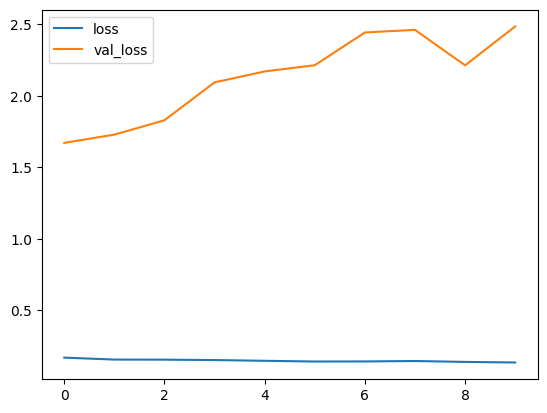

In [252]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

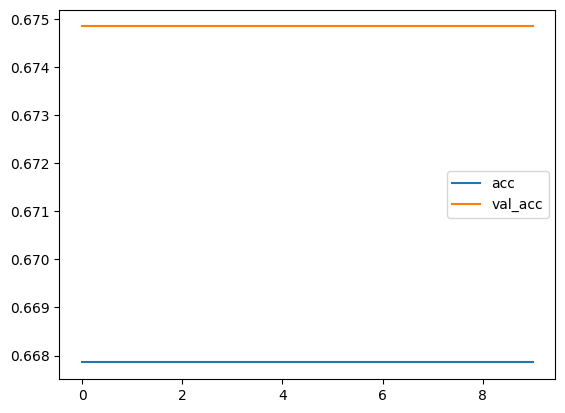

In [253]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [254]:
model.predict(data_test)

C:\Users\nicho\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)